Copyright ©2021-2022. Stephen Rigden.
This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.
This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
You should have received a copy of the GNU General Public License along with this program.  If not, see <http://www.gnu.org/licenses/>.

# Plot Heart Rate

In [98]:
import pandas
from pathlib import Path
from matplotlib import pyplot
import seaborn

from utilities import TimeCategories


seaborn.set_style('darkgrid')  # one of {darkgrid, whitegrid, dark, white, ticks}

In [99]:
project_path = Path.cwd().parent
heart_df_pickle = project_path / 'data' / 'processed' / 'heart_preprocessed.pickle'
heart_rate_pdf = project_path / 'reports' / 'heart_rate.pdf'
heart_rate_jpg = project_path / 'reports' / 'heart_rate.jpg'

In [100]:
ds = pandas.read_pickle(heart_df_pickle)

heart_rate = ds['type'] == 'HKQuantityTypeIdentifierHeartRate'
ds = ds.loc[heart_rate, ['date', 'value']]
ds = ds.rename(columns={'value': 'heart rate'})

#### Review the data's structure

In [101]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176143 entries, 5 to 176147
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        176143 non-null  datetime64[ns]
 1   heart rate  176143 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.0 MB


In [102]:
ds.head()

,date,heart rate
5,2020-03-30 20:11:49,67.0
6,2020-03-30 20:16:17,67.0
7,2020-03-30 20:21:09,61.0
8,2020-03-30 20:21:13,64.0
9,2020-03-30 20:21:18,63.0


In [103]:
ds.date.max()

Timestamp('2021-12-01 18:19:16')

In [104]:
ds.date.min()

Timestamp('2020-03-30 20:11:49')

### Divide data into ten time buckets

In [105]:
start = ds.date.min()
end = ds.date.max()
period_of_interest = end - start
bucket_size = int(str(period_of_interest.days)) // 10
categories = TimeCategories(start, end, bucket_size)
categories

TimeCategories(start_date=Timestamp('2020-04-01 18:19:16'), end_date=Timestamp('2021-12-01 18:19:16'), bucket_size=61)

In [106]:
ds['bucket'] = ds['date'].apply(categories.get_bucket)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176143 entries, 5 to 176147
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        176143 non-null  datetime64[ns]
 1   heart rate  176143 non-null  float64       
 2   bucket      175826 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.4+ MB


### Box plot

<AxesSubplot:xlabel='bucket', ylabel='heart rate'>

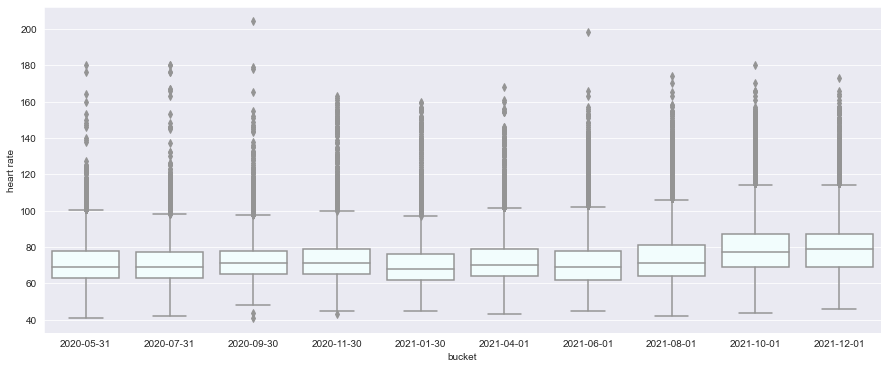

In [107]:
_, axes = pyplot.subplots(figsize=(15, 6))
seaborn.boxplot(data=ds,
                x='bucket', y='heart rate',
                ax=axes, palette=['azure'])

### Boxenplot

<AxesSubplot:xlabel='bucket', ylabel='heart rate'>

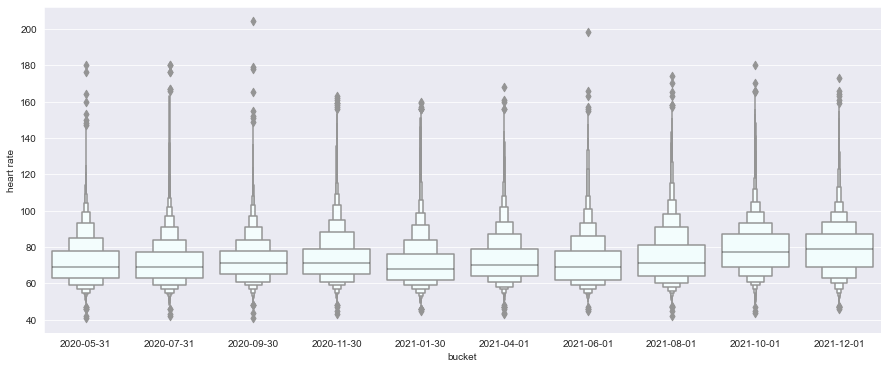

In [108]:
_, axes = pyplot.subplots(figsize=(15, 6))
seaborn.boxenplot(data=ds,
                x='bucket', y='heart rate',
                ax=axes, palette=['azure'])

### Ten period buckets since June 1st, 2021

In [109]:
start = pandas.Timestamp(year=2021, month=6, day=1)
period_of_interest = end - start
bucket_size = int(str(period_of_interest.days)) // 10
categories_2 = TimeCategories(start, end, bucket_size)
categories_2

TimeCategories(start_date=Timestamp('2021-06-05 18:19:16'), end_date=Timestamp('2021-12-01 18:19:16'), bucket_size=18)

In [110]:
ds2 = ds.loc[:, ['date', 'heart rate']]
ds2.head()

,date,heart rate
5,2020-03-30 20:11:49,67.0
6,2020-03-30 20:16:17,67.0
7,2020-03-30 20:21:09,61.0
8,2020-03-30 20:21:13,64.0
9,2020-03-30 20:21:18,63.0


In [111]:
ds2['bucket'] = ds2['date'].apply(categories_2.get_bucket)
ds2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176143 entries, 5 to 176147
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        176143 non-null  datetime64[ns]
 1   heart rate  176143 non-null  float64       
 2   bucket      75964 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 9.4+ MB


### Combination plot: Boxenplot + observation count

[Text(0.5, 0, '18 Day intervals'), Text(0, 0.5, 'observation count')]

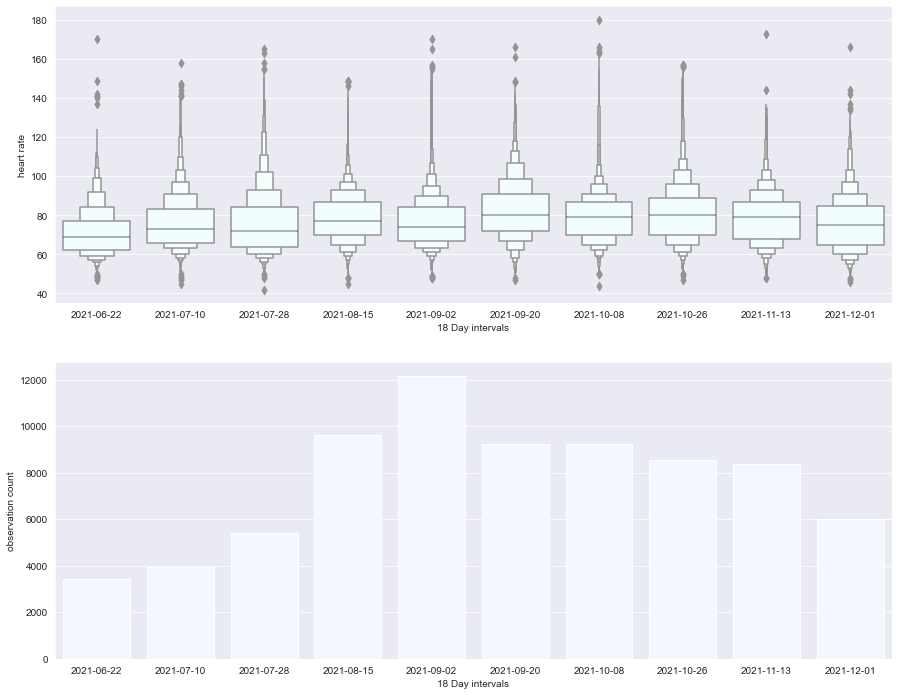

In [112]:
fig, axes = pyplot.subplots(nrows=2, ncols=1, figsize=(15, 12))

seaborn.boxenplot(data=ds2,
                  x='bucket', y='heart rate',
                  ax=axes[0],
                  palette=['azure']
                  )

seaborn.countplot(data=ds2,
                  x='bucket',
                  ax=axes[1],
                  palette=['aliceblue']
                  )

axes[0].set(xlabel=f'{bucket_size} Day intervals')
axes[1].set(xlabel=f'{bucket_size} Day intervals', ylabel='observation count')

In [113]:
# Save the plots
fig.savefig(heart_rate_jpg)
fig.savefig(heart_rate_pdf)